In [1]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import VotingRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import roc_auc_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn import linear_model
from sklearn import ensemble
from sklearn import svm
from catboost import CatBoostClassifier, Pool
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import optuna

import warnings
warnings.filterwarnings("ignore")

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = pd.read_csv('data.csv')
target = data['Cholesterol Total (mg/dL)']
data = data.drop('Cholesterol Total (mg/dL)', axis=1)

In [3]:
data

,Responden,Jenis Kelamin,Usia,Tekanan darah (S),Tekanan darah (D),Tinggi badan (cm),Berat badan (kg),IMT (kg/m2),Lingkar perut (cm),Glukosa Puasa (mg/dL),Trigliserida (mg/dL),Fat,Visceral Fat,Masa Kerja,Tempat lahir
0,1,M,19.0,126.0,88.0,172.5,49.50,16.53,66.0,84.0,99.0,26.4,6.0,0.97,Purworejo
1,2,M,19.0,120.0,80.0,158.0,53.60,21.50,71.0,84.0,99.0,26.4,6.0,0.60,Bogor
2,3,M,19.0,120.0,80.0,170.0,59.50,20.59,80.0,80.0,99.0,26.4,6.0,1.37,bandung
3,4,F,19.0,100.0,70.0,149.0,45.10,20.31,62.0,81.0,99.0,30.5,3.5,1.00,Jakarta
4,5,M,19.0,110.0,70.0,171.6,62.40,21.19,78.0,84.0,99.0,26.4,6.0,4.00,Teluk Betung
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,1335,M,39.0,110.0,70.0,162.5,67.60,25.60,87.0,84.0,72.0,23.8,11.0,6.00,Bogor
1335,1336,F,39.0,120.0,70.0,150.0,60.50,26.90,77.0,84.0,105.0,38.1,9.0,6.15,Bogor
1336,1337,F,39.0,120.0,80.0,151.0,59.75,26.20,78.0,84.0,78.0,35.3,8.0,26.00,Bogor
1337,1338,M,39.0,110.0,70.0,166.2,57.00,20.63,69.0,84.0,98.0,17.1,5.0,4.30,Bogor


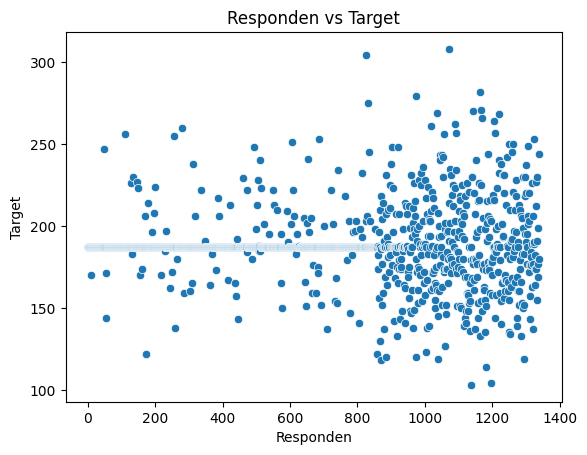

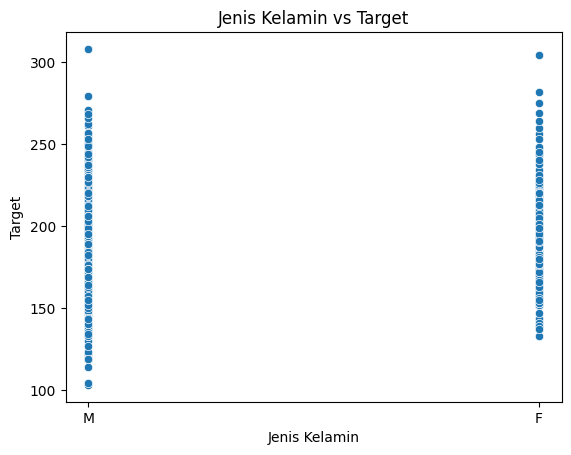

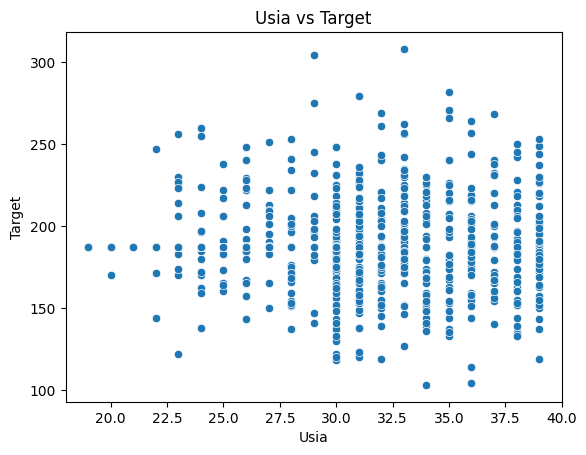

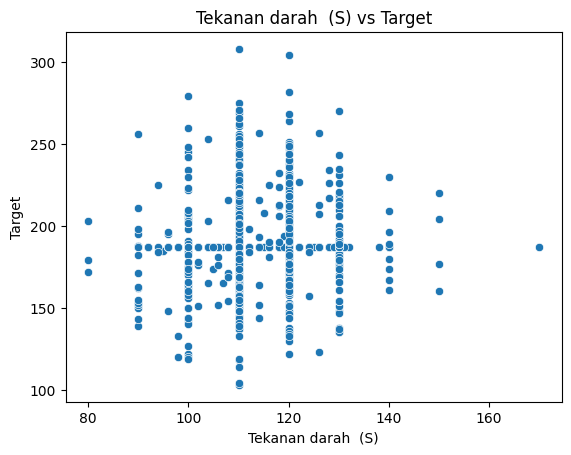

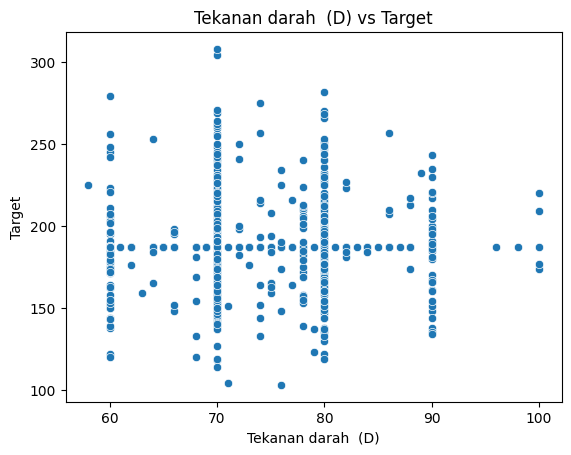

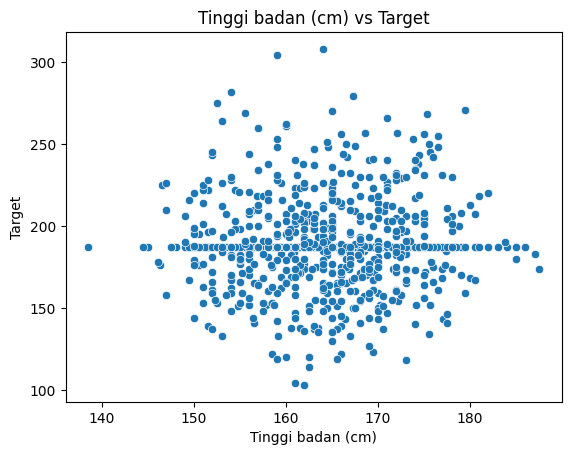

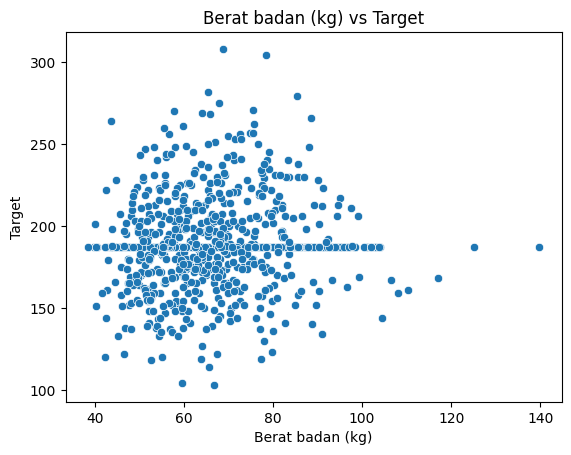

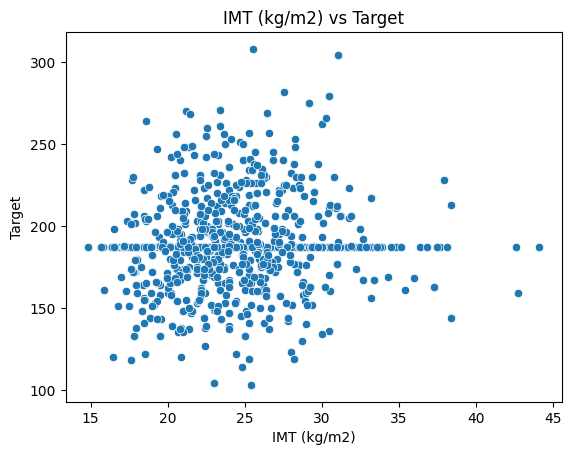

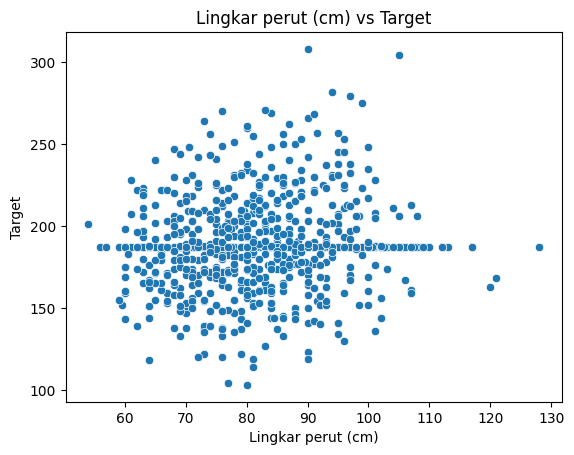

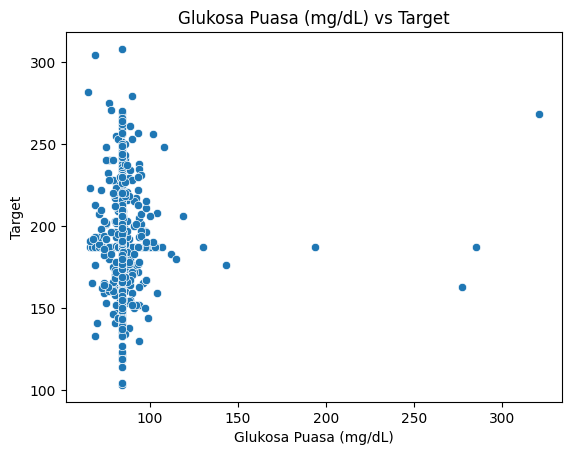

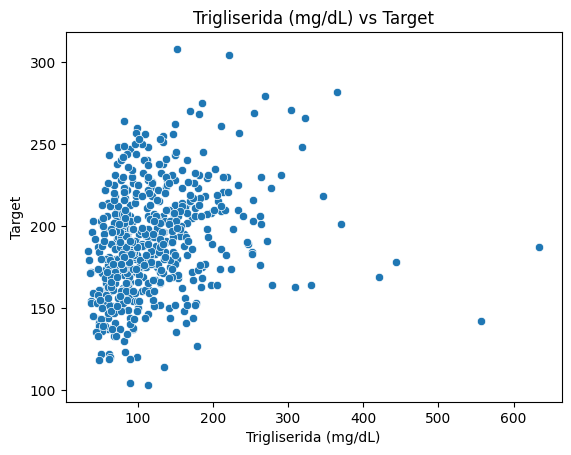

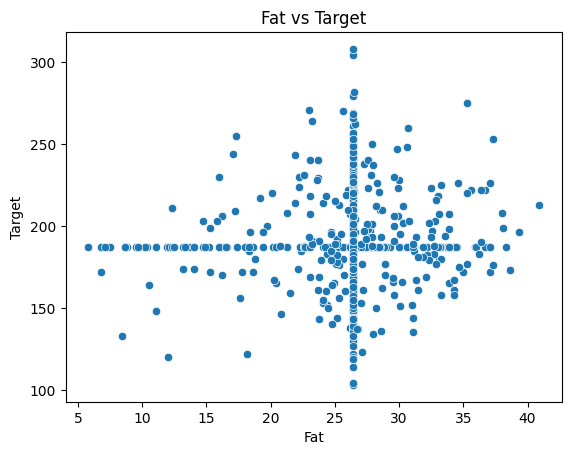

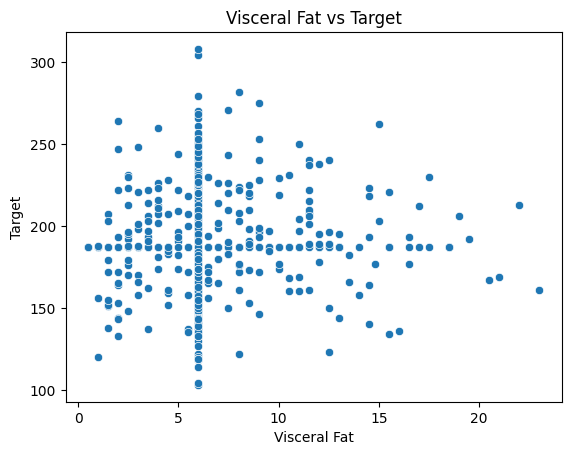

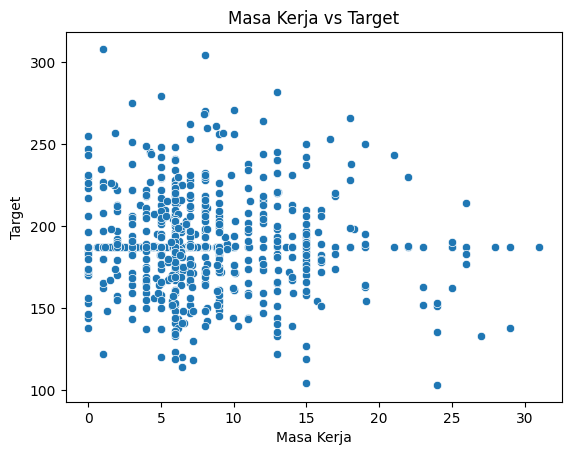

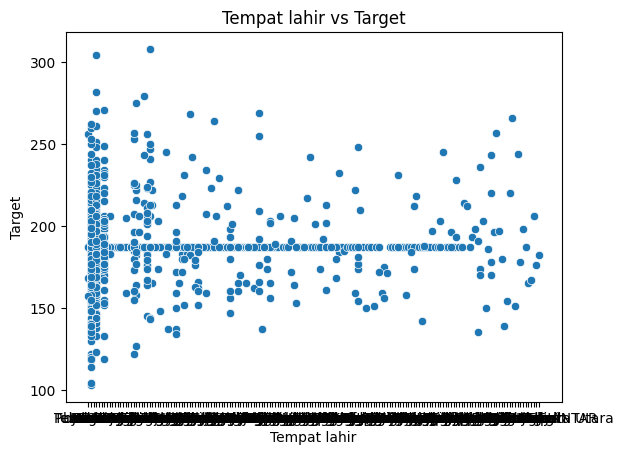

In [4]:
for column in data.columns:
    plt.figure()
    sns.scatterplot(x=data[column], y=target)
    plt.xlabel(column)
    plt.ylabel('Target')
    plt.title(f'{column} vs Target')
    plt.show()


In [5]:
data = pd.read_csv('data.csv')

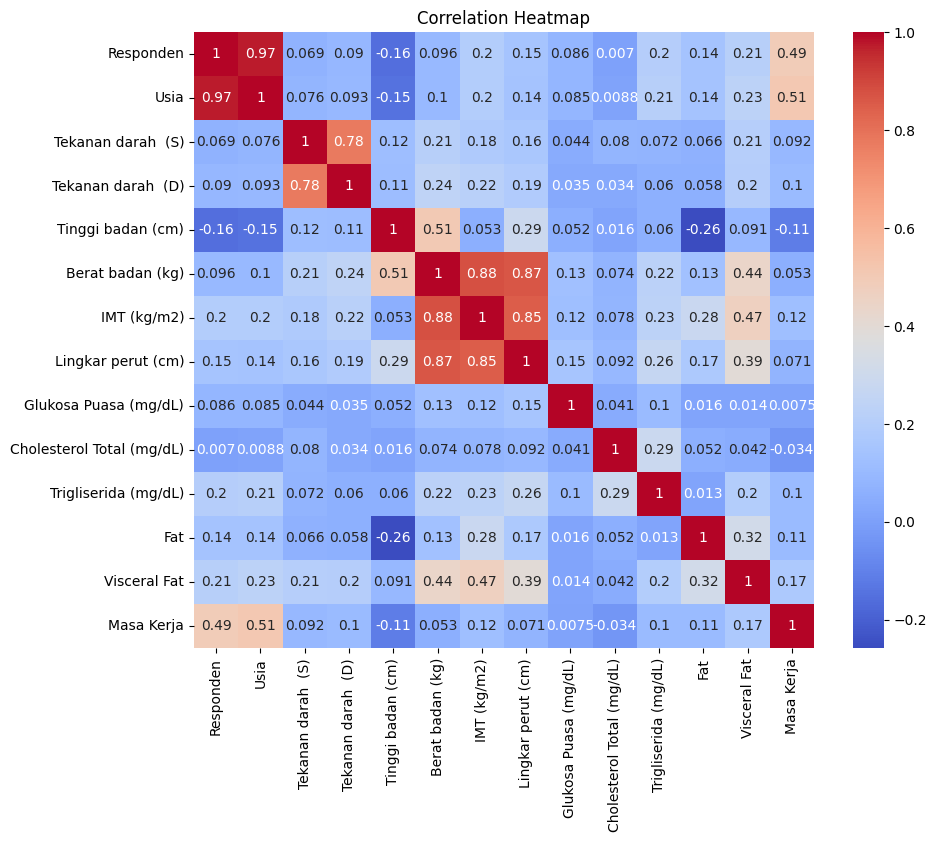

In [6]:
numerical_data = data.select_dtypes(include=np.number)
correlation_matrix = numerical_data.corr()
highest_correlation_column = correlation_matrix['Cholesterol Total (mg/dL)'].abs().idxmax()
highest_correlation_value = correlation_matrix['Cholesterol Total (mg/dL)'].abs().max()

highest_correlation_column, highest_correlation_value
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap Semua Data')
plt.show()


In [7]:
from sklearn.linear_model import LogisticRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_subset, target, test_size=0.2, random_state=42)

# Create a logistic regression model
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = logreg.score(X_test, y_test)


NameError: name 'data_subset' is not defined

In [ ]:
import numpy as np
from sklearn.feature_selection import mutual_info_regression

# Select only numerical features
numerical_features = data.select_dtypes(include=np.number)

# Calculate mutual information scores
mutual_info_scores = mutual_info_regression(numerical_features, target)

# Select features with high mutual information scores
important_features = numerical_features.columns[mutual_info_scores > 0.1]

# Subset the data with important features
data_subset = data[important_features]


In [ ]:
accuracy

0.5932835820895522

In [ ]:
target

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Iterate over each column in the dataframe
for column in data.columns:
    # Plot the data distribution
    sns.histplot(data[column])
    
    # Add labels and title
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    
    # Show the plot
    plt.show()
